# 88-Inch Foil Activation Experiment to measure 33MeV Deutron Break-up on Ta neutron Spectrum

This notebook contains the code necessary to generate STAYSL inputs, a description on how to run STAYSL, and the anaysis and plotting of the resulting outputs.  

## BCF

The STASYL BCF input files are generated from the recoded beam current monitor files stores at:

In [1]:
from Support.Utilities import check_path

bcmPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/BCM/CleanBeam_Trimmed.bcm'
check_path(bcmPath)

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/BCM/CleanBeam_Trimmed.bcm


True

The file used is a modified version of the BCM created file where pre and post calibrations are removed from the file; only the actual irradiation measurements are included.

Support for generating the BCF input files can be found in the [PyScripts Repo](http://github.com/jamesbevins/PyScripts). 

In [2]:
from Unfolding.STAYSL import bcmToBCF

bcfPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/BCF/flux_history.dat'
bcmToBCF(bcmPath, bcfPath)

The total measurment time was 7866.0 seconds with an integrated measurement of 0.041859432.


The BCF file will be placed at the path indicated above.  The BCF code can be executed by double clicking on the BCF executable and typing in the BCF input file name.

## SHIELD

SHIELD requires a fine group cross section file.  For this, the [14468 group shield cross sections](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shld_xsect.out) were used.

NOTE: SHIELD is only valid/necessary for non-threshold reactions.

The course group structure is specified in the [shldengrp.dat](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldengrp.dat) file, but this is not required with STAYSL PNNL v 1.2.0.

The [input file](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldinput.dat) was generated using as measured quantities found in the [foil dimensions spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/BeamOnlyData/BeamFoilDimensions.xlsx).

SHIELD is ran by double clicking the SHIELD executable located in the same directory as the input files.

## SigPhi Calculator

The [SigPhi Calculator](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/SigPhi_Calculator_1.2_CleanBeam.xlsm) was filled in with data from the [foil dimensions spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/BeamOnlyData/BeamFoilDimensions.xlsx), [BCF output](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/BCF/flux_history.out), and the [experimental analysis data](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/33MeV_ETA_Activation_Analysis.pdf).

** Note: the activities are in units of Bq/g and were adjusted as such from the calculated $A_0$ values **

## STAYSL_PNNL

The STAYSL_PNNL input file was created from the [SigPhi Calculator](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/SigPhi_Calculator_1.2_CleanBeam.xlsm) and [MCNP simulation results]().

Default values for covariance data using Gaussian formalism were used.

The [SHIELD library input file](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/sshldlib.dat) is an appropriately named copy of the [SHIELD ouput file](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldinput.out).

The flux normalization factor (TNORM) for the MCNP flux was calculated using the [Beam Calcs spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/ETA_88_BeamCalcs.xlsx) and experimental data.

To get the flux and flux uncertainty data from the MCNP output into STAYSL format:

In [3]:
from GeneralNuclear.MCNP import read_tally
from Unfolding.STAYSL import stayslFlux

simPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/BeamOnly/Model/33MeVTaBeamOnly_Foil.out'
check_path(simPath)

(tallyFrame,tallyTot, ucertTot) = read_tally(simPath, 214, readGroups=True, splitTally=False)
tallyFrame = tallyFrame.drop(tallyFrame.index[0])

stayslFlux(tallyFrame, maxBinAdjust=30, adjFlux=5E-9, adjUncert=1.0)

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/BeamOnly/Model/33MeVTaBeamOnly_Foil.out
The flux:
 5.0000e-09 5.0000e-09 5.0000e-09 5.0000e-09 5.0000e-09 5.0000e-09 5.0000e-09 
 5.0000e-09 5.0000e-09 5.0000e-09 5.0000e-09 5.0000e-09 5.0000e-09 5.0000e-09 
 5.0000e-09 5.0000e-09 5.0000e-09 7.9125e-10 5.0000e-09 5.0000e-09 5.0000e-09 
 2.4034e-10 1.2500e-09 2.7033e-09 1.2672e-09 5.0000e-09 8.0589e-10 4.0047e-10 
 1.1380e-09 3.7101e-11 1.8246e-09 5.1787e-10 4.4323e-10 0.0000e+00 2.1595e-10 
 0.0000e+00 5.3808e-09 3.4676e-10 5.7107e-09 1.8696e-09 1.3147e-09 2.8840e-10 
 2.5256e-09 7.3464e-10 9.7974e-09 3.8167e-09 6.7946e-09 9.2575e-09 1.2947e-08 
 8.2647e-09 8.2230e-09 3.0348e-08 4.2098e-08 3.2108e-08 2.0447e-08 4.2420e-08 
 6.1212e-08 2.9381e-08 2.2786e-08 4.6676e-08 5.2816e-08 5.3527e-08 8.4569e-08 
 8.1813e-08 1.0155e-07 7.1480e-08 8.1417e-08 6.5542e-08 8.8032e-08 1.0748e-07 
 2.3994e-07 1.8305e-07 8.8994e-07 1.4557e-07 5.3987e-07 6.

The STAYSL code is ran by double clicking the executable or running from the command line. 

## Output Analysis

Read the data from the output file using pandas. Convert relative std to absolute.

In [4]:
import pandas as pd

path = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/stayslin.out'
df = pd.read_table(path, engine='python', sep='\s+', skiprows=99, skipfooter=649, header=None,
                   names=['lowE', 'adjFlux', 'unadjFlux', 'fluxRatio', 'adjStd', 
                          'unadjStd', 'uncertRatio', 'integralFlux', 'intFluxUncert'])

df.apply(pd.to_numeric)
df['adjStd'] = df['adjStd'] * df['adjFlux'] / 100
df['unadjStd'] = df['unadjStd'] * df['unadjFlux'] / 100

df

,lowE,adjFlux,unadjFlux,fluxRatio,adjStd,unadjStd,uncertRatio,integralFlux,intFluxUncert
1,1.000000e-10,3.767600e+10,2.255600e+10,1.670,2.552549e+10,2.255600e+10,0.677,378820.000,4.55
2,1.000000e-09,3.842800e+09,2.255600e+09,1.704,2.442868e+09,2.255600e+09,0.636,378790.000,4.55
3,1.000000e-08,2.702100e+09,1.561500e+09,1.730,1.617477e+09,1.561500e+09,0.599,378750.000,4.55
4,2.300000e-08,1.316300e+09,7.518500e+08,1.751,7.473951e+08,7.518500e+08,0.568,378720.000,4.55
5,5.000000e-08,1.378100e+09,7.807700e+08,1.765,7.502376e+08,7.807700e+08,0.544,378680.000,4.55
6,7.600000e-08,9.235600e+08,5.205100e+08,1.774,4.881015e+08,5.205100e+08,0.529,378640.000,4.55
7,1.150000e-07,6.567000e+08,3.690900e+08,1.779,3.413527e+08,3.690900e+08,0.520,378610.000,4.55
8,1.700000e-07,4.252300e+08,2.388200e+08,1.781,2.200565e+08,2.388200e+08,0.518,378570.000,4.55
9,2.550000e-07,2.888700e+08,1.624000e+08,1.779,1.504146e+08,1.624000e+08,0.521,378540.000,4.55
10,3.800000e-07,2.118500e+08,1.194100e+08,1.774,1.120686e+08,1.194100e+08,0.529,378500.000,4.55


Convert to Histograms and plot the adjusted and unadjusted flux.

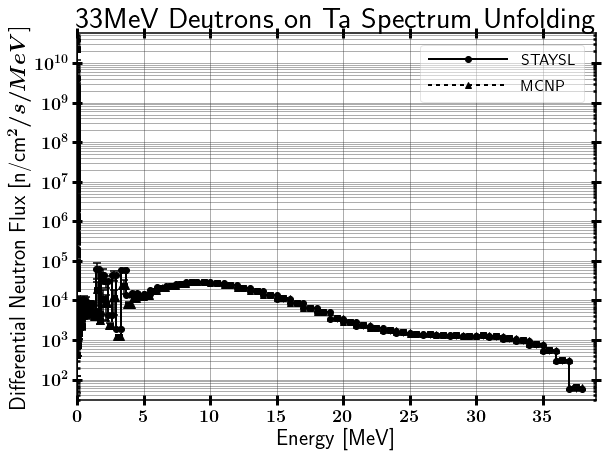

In [5]:
from DataAnalysis.Histograms import Histogram
import matplotlib
%matplotlib inline

outpath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/'

adjDiffHisto = Histogram()
adjDiffHisto.build_histo(df['lowE'].tolist(), df['adjFlux'].tolist(), uncert=df['adjStd'].tolist(),
                     edgeLoc='low', name='STAYSL')

unadjDiffHisto = Histogram()
unadjDiffHisto.build_histo(df['lowE'].tolist(), df['unadjFlux'].tolist(), uncert=df['unadjStd'].tolist(),
                     edgeLoc='low', name='MCNP')

adjDiffHisto.plot(unadjDiffHisto, xMin=1E-6, logX=False, logY=True,
                  title='33MeV Deutrons on Ta Spectrum Unfolding',
                  xLabel='Energy [MeV]', yLabel='Differential Neutron Flux [n/cm^2/s/MeV]',
                  savePath=outpath+'33MeVTa_Staysl-Unfold_Differential')

Convert from differential spectrum and plot.

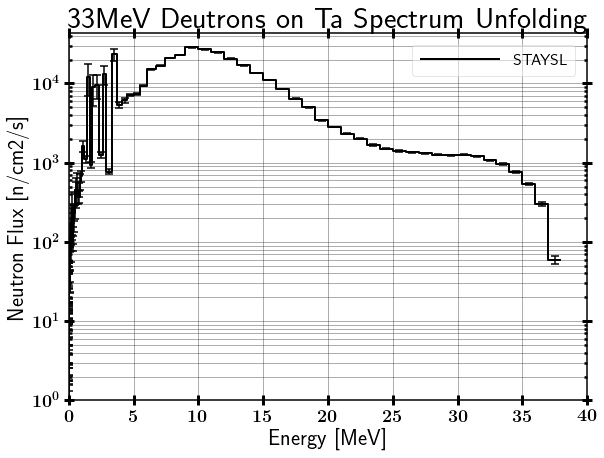

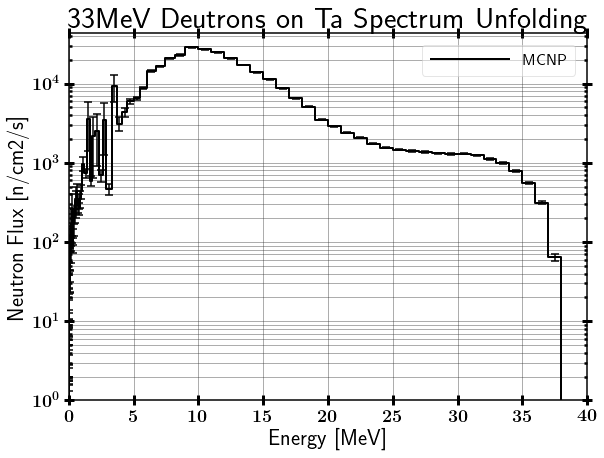

C:\Users\James\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


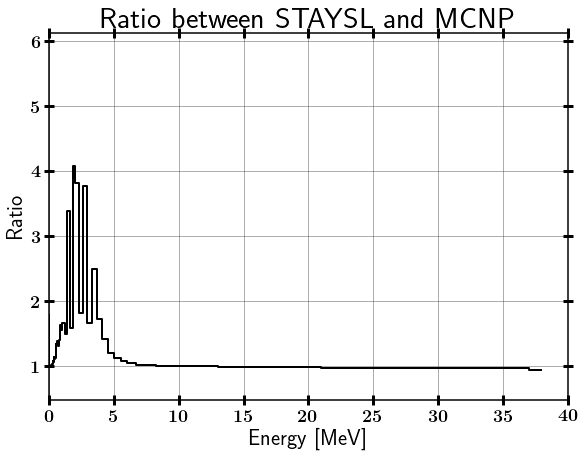

In [6]:
from DataAnalysis.DataManipulation import bin_integration

adjHisto = Histogram()
adjHisto.build_histo(df['lowE'].tolist(),
                     bin_integration(df['lowE'].tolist(), df['adjFlux'].tolist(), 'low'),
                     uncert=bin_integration(df['lowE'].tolist(), df['adjStd'].tolist(), 'low'),
                     edgeLoc='low', name='STAYSL')

adjHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold')

mcnpHisto = Histogram()
normFactor = 4.0600E+9
tallyFrame['normTally'] = tallyFrame['tally'] * normFactor
tallyFrame['normUncertainty'] = tallyFrame['uncertainty'] * tallyFrame['normTally']
mcnpHisto.build_histo(tallyFrame['bin'].tolist(), tallyFrame['normTally'].tolist(), 
                       uncert=tallyFrame['normUncertainty'].tolist(), edgeLoc='up', name='MCNP')
mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_MCNP')

ratioHisto = Histogram()
ratioHisto.build_histo(df['lowE'].tolist(), df['fluxRatio'].tolist(), edgeLoc='low')
ratioHisto.plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP',
              xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio')

### Iterative Solution #1:

  - The iterative solution sets the uncertainty below 3 MeV to 100%.
  - It does not update the uncertainty until $\chi^2$ converged.
  - The iterative solution sets the uncertainty for zero flux bins  below 1 MeV to 100% and sets a nominal 5E-9 flux per src.    

In [7]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration1/'

# Build Data Structure Lists
iterSoln = []
iterAdjHisto = []
iterRatioHisto = []

iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=False, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration1/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: False
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration1/stayslin.out
Chi^2 = 45.47142, Std Norm = 7.65525773113
Chi^2 = 42.18871
Chi^2 = 40.89068
Chi^2 = 39.81719
Chi^2 = 38.96852
Chi^2 = 38.1922
Chi^2 = 37.4593
Chi^2 = 36.76212
Chi^2 = 36.09647
Chi^2 = 35.4585
Chi^2 = 34.84955
Chi^2 = 34.26353
Chi^2 = 33.70173
Chi^2 = 33.16149
Chi^2 = 32.64285
Chi^2 = 32.14389
Chi^2 = 31.66333
Chi^2 = 31.19968
Chi^2 = 30.7516
Chi^2 = 30.31928
Chi^2 = 29.90165
Chi^2 = 29.4971
Chi^2 = 29.1075
Chi^2 = 28.72893
Chi^2 = 28.36211
Chi^2 = 28.00648
Chi^2 = 27.66196
Chi^2 = 27.32714
Chi^2 = 27.0019
Chi^2 = 26.68629
Chi^2 = 26.37904
Chi^2 = 

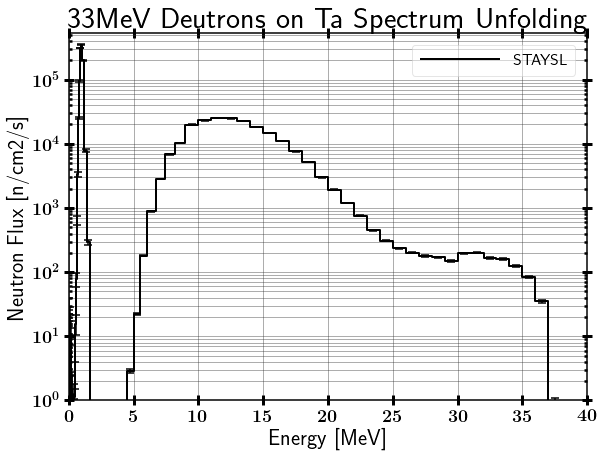

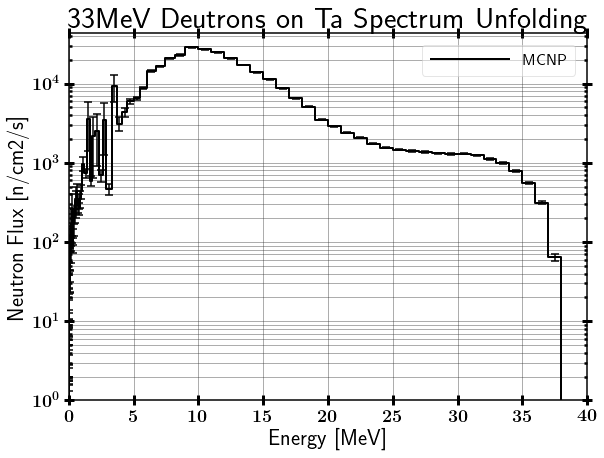

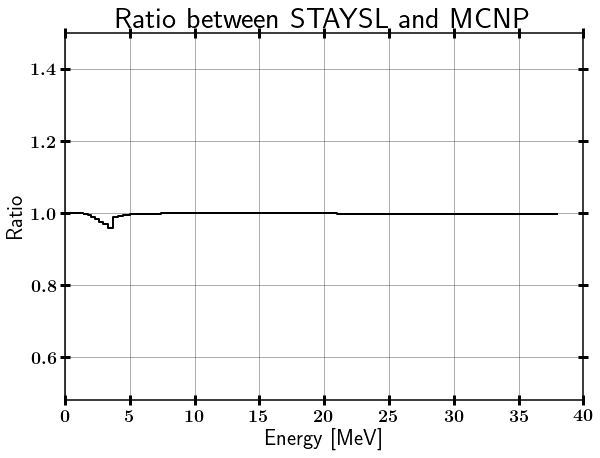

In [8]:
iter = 0

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[-1]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

### Iterative Solution #2:

  - The iterative solution sets the uncertainty below 3 MeV to 100%.
  - It does update the uncertainty throughout the convergence process.
  - The iterative solution sets the uncertainty for zero flux bins  below 1 MeV to 100% and sets a nominal 5E-9 flux per src.    

In [9]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration2/'
iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration2/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration2/stayslin.out
Chi^2 = 45.47142, Std Norm = 7.65525773113
Chi^2 = 42.84139
Chi^2 = 42.56058
Chi^2 = 42.40508
Chi^2 = 42.26144
Chi^2 = 42.11436
Chi^2 = 41.96675
Chi^2 = 41.82259
Chi^2 = 41.68462
Chi^2 = 41.55396
Chi^2 = 41.43062
Chi^2 = 41.3135
Chi^2 = 41.2036
Chi^2 = 41.09834
Chi^2 = 40.99712
Chi^2 = 40.90064
Chi^2 = 40.80646
Chi^2 = 40.71572
Chi^2 = 40.62768
Chi^2 = 40.54211
Chi^2 = 40.45957
Chi^2 = 40.37822
Chi^2 = 40.29838
Chi^2 = 40.22098
Chi^2 = 40.14433
Chi^2 = 40.06887
Chi^2 = 39.99574
Chi^2 = 39.92302
Chi^2 = 39.853
Chi^2 = 39.78305
Chi^2 = 39.71378
Chi^2 

Chi^2 = 19.9744
Chi^2 = 19.94622
Chi^2 = 19.91899
Chi^2 = 19.89123
Chi^2 = 19.86378
Chi^2 = 19.83614
Chi^2 = 19.80873
Chi^2 = 19.78124
Chi^2 = 19.75396
Chi^2 = 19.72697
Chi^2 = 19.70019
Chi^2 = 19.67322
Chi^2 = 19.64567
Chi^2 = 19.61879
Chi^2 = 19.59165
Chi^2 = 19.56522
Chi^2 = 19.53868
Chi^2 = 19.51168
Chi^2 = 19.48479
Chi^2 = 19.45862
Chi^2 = 19.43193
Chi^2 = 19.40528
Chi^2 = 19.37963
Chi^2 = 19.35338
Chi^2 = 19.32751
Chi^2 = 19.30163
Chi^2 = 19.27559
Chi^2 = 19.24965
Chi^2 = 19.22342
Chi^2 = 19.19747
Chi^2 = 19.17148
Chi^2 = 19.14564
Chi^2 = 19.11995
Chi^2 = 19.09456
Chi^2 = 19.06906
Chi^2 = 19.04405
Chi^2 = 19.01909
Chi^2 = 18.99346
Chi^2 = 18.96803
Chi^2 = 18.94278
Chi^2 = 18.91795
Chi^2 = 18.89327
Chi^2 = 18.86858
Chi^2 = 18.84352
Chi^2 = 18.81834
Chi^2 = 18.7935
Chi^2 = 18.76882
Chi^2 = 18.74426
Chi^2 = 18.71941
Chi^2 = 18.69467
Chi^2 = 18.67013
Chi^2 = 18.64576
Chi^2 = 18.6213
Chi^2 = 18.5963
Chi^2 = 18.57169
Chi^2 = 18.54703
Chi^2 = 18.52298
Chi^2 = 18.49886
Chi^2 = 18.47471
C

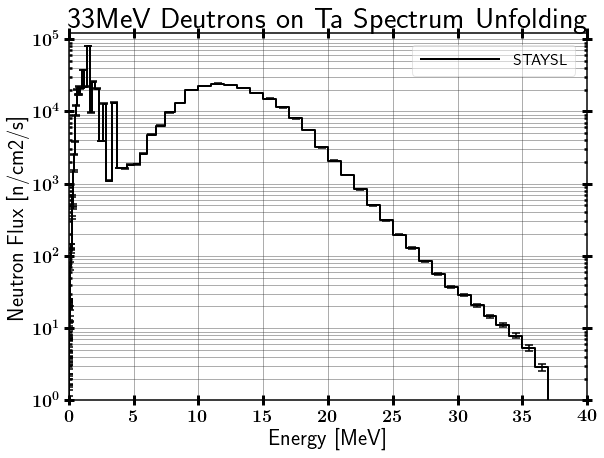

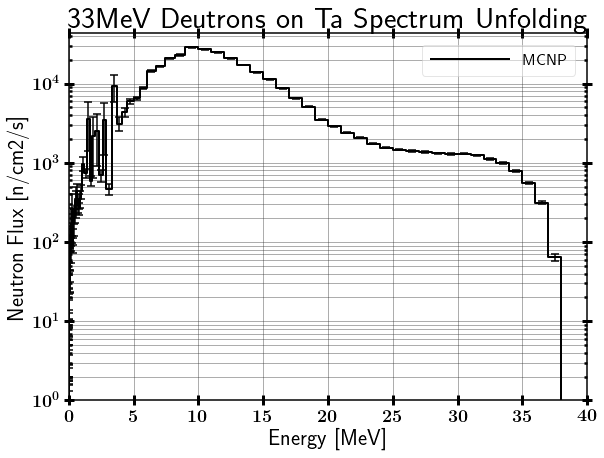

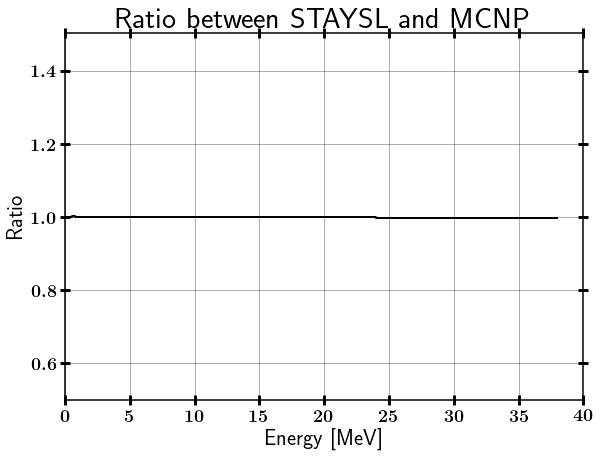

In [25]:
iter = 1

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[-1]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

### Iterative Solution #3:
 
  - It starts with smoothing the initial guess in the 1-3.7 MeV range.
  - The iterative solution sets the uncertainty for zero flux bins  below 1 MeV to 100% and sets a nominal 5E-9 flux per src.    
  - It does update the uncertainty throughout the convergence process. 

In [11]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration3/'
iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration3/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration3/stayslin.out
Chi^2 = 56.75282, Std Norm = 5.37838346904
Chi^2 = 43.93587
Chi^2 = 43.13783
Chi^2 = 43.00441
Chi^2 = 42.90702
Chi^2 = 42.79698
Chi^2 = 42.6759
Chi^2 = 42.55132
Chi^2 = 42.42734
Chi^2 = 42.30703
Chi^2 = 42.1909
Chi^2 = 42.08104
Chi^2 = 41.97555
Chi^2 = 41.8732
Chi^2 = 41.77362
Chi^2 = 41.67734
Chi^2 = 41.58385
Chi^2 = 41.49238
Chi^2 = 41.4029
Chi^2 = 41.31448
Chi^2 = 41.22773
Chi^2 = 41.14201
Chi^2 = 41.05772
Chi^2 = 40.97362
Chi^2 = 40.89136
Chi^2 = 40.80951
Chi^2 = 40.72871
Chi^2 = 40.64916
Chi^2 = 40.57059
Chi^2 = 40.49169
Chi^2 = 40.41266
Chi^2 

Chi^2 = 18.85821
Chi^2 = 18.83121
Chi^2 = 18.80394
Chi^2 = 18.77636
Chi^2 = 18.7495
Chi^2 = 18.72254
Chi^2 = 18.69505
Chi^2 = 18.66822
Chi^2 = 18.64123
Chi^2 = 18.61449
Chi^2 = 18.58772
Chi^2 = 18.5608
Chi^2 = 18.53416
Chi^2 = 18.50717
Chi^2 = 18.48092
Chi^2 = 18.45442
Chi^2 = 18.42783
Chi^2 = 18.40139
Chi^2 = 18.37509
Chi^2 = 18.34873
Chi^2 = 18.32251
Chi^2 = 18.29662
Chi^2 = 18.27089
Chi^2 = 18.24483
Chi^2 = 18.21882
Chi^2 = 18.19291
Chi^2 = 18.1674
Chi^2 = 18.14194
Chi^2 = 18.11674
Chi^2 = 18.09132
Chi^2 = 18.06606
Chi^2 = 18.04072
Chi^2 = 18.01566
Chi^2 = 17.99092
Chi^2 = 17.96592
Chi^2 = 17.94105
Chi^2 = 17.91639
Chi^2 = 17.89164
Chi^2 = 17.86683
Chi^2 = 17.84187
Chi^2 = 17.81713
Chi^2 = 17.79272
Chi^2 = 17.76789
Chi^2 = 17.7433
Chi^2 = 17.71879
Chi^2 = 17.6943
Chi^2 = 17.66969
Chi^2 = 17.64556
Chi^2 = 17.62155
Chi^2 = 17.59709
Chi^2 = 17.57257
Chi^2 = 17.54893
Chi^2 = 17.52441
Chi^2 = 17.50011
Chi^2 = 17.47597
Chi^2 = 17.45221
Chi^2 = 17.42816
Chi^2 = 17.40388
Chi^2 = 17.38031
Ch

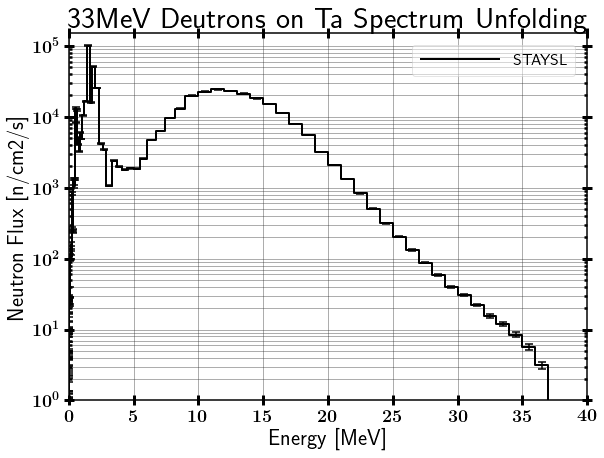

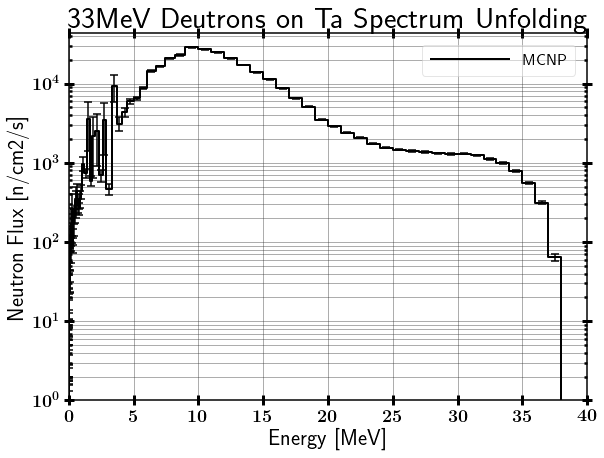

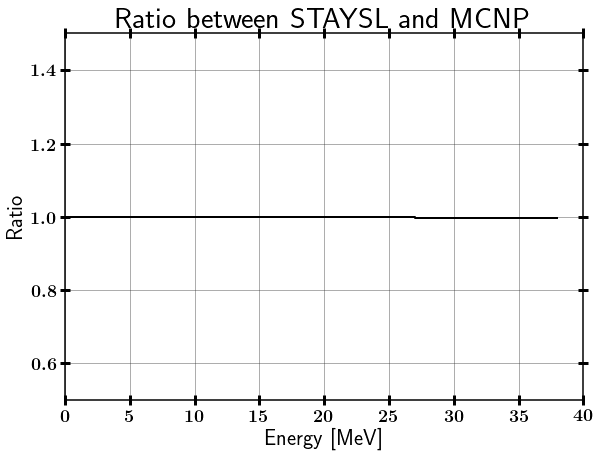

In [12]:
iter = 2

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[-1]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

### Iterative Solution #4:

  - The iterative solution sets the uncertainty for zero flux bins  below 1 MeV to 100% and sets a nominal 5E-9 flux per src.  
  - It does update the uncertainty throughout the convergence process. 

In [13]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration4/'
iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration4/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration4/stayslin.out
Chi^2 = 49.62848, Std Norm = 5.35955128812
Chi^2 = 43.70895
Chi^2 = 43.37536
Chi^2 = 43.28095
Chi^2 = 43.18985
Chi^2 = 43.08328
Chi^2 = 42.97019
Chi^2 = 42.85419
Chi^2 = 42.7382
Chi^2 = 42.62684
Chi^2 = 42.51871
Chi^2 = 42.41615
Chi^2 = 42.31731
Chi^2 = 42.22201
Chi^2 = 42.12976
Chi^2 = 42.03951
Chi^2 = 41.95207
Chi^2 = 41.86539
Chi^2 = 41.78222
Chi^2 = 41.70063
Chi^2 = 41.61998
Chi^2 = 41.54178
Chi^2 = 41.46391
Chi^2 = 41.3872
Chi^2 = 41.31082
Chi^2 = 41.2374
Chi^2 = 41.16526
Chi^2 = 41.09313
Chi^2 = 41.02061
Chi^2 = 40.95028
Chi^2 = 40.88016
Chi^2

Chi^2 = 20.60993
Chi^2 = 20.5815
Chi^2 = 20.5527
Chi^2 = 20.52418
Chi^2 = 20.49548
Chi^2 = 20.46727
Chi^2 = 20.4387
Chi^2 = 20.41046
Chi^2 = 20.38208
Chi^2 = 20.35396
Chi^2 = 20.32539
Chi^2 = 20.29773
Chi^2 = 20.26982
Chi^2 = 20.24133
Chi^2 = 20.21328
Chi^2 = 20.18576
Chi^2 = 20.15823
Chi^2 = 20.13065
Chi^2 = 20.10272
Chi^2 = 20.07517
Chi^2 = 20.04739
Chi^2 = 20.02008
Chi^2 = 19.99336
Chi^2 = 19.9658
Chi^2 = 19.93836
Chi^2 = 19.91161
Chi^2 = 19.88524
Chi^2 = 19.85763
Chi^2 = 19.83081
Chi^2 = 19.80387
Chi^2 = 19.77682
Chi^2 = 19.74997
Chi^2 = 19.72407
Chi^2 = 19.69727
Chi^2 = 19.67045
Chi^2 = 19.64389
Chi^2 = 19.61784
Chi^2 = 19.59189
Chi^2 = 19.56641
Chi^2 = 19.54008
Chi^2 = 19.51408
Chi^2 = 19.488
Chi^2 = 19.46228
Chi^2 = 19.43677
Chi^2 = 19.41079
Chi^2 = 19.38504
Chi^2 = 19.35938
Chi^2 = 19.33402
Chi^2 = 19.30855
Chi^2 = 19.28292
Chi^2 = 19.25752
Chi^2 = 19.23208
Chi^2 = 19.20736
Chi^2 = 19.18216
Chi^2 = 19.15659
Chi^2 = 19.13118
Chi^2 = 19.10582
Chi^2 = 19.08089
Chi^2 = 19.05614
Chi

Chi^2 = 11.91135
Chi^2 = 11.90066
Chi^2 = 11.88982
Chi^2 = 11.87941
Chi^2 = 11.86886
Chi^2 = 11.85816
Chi^2 = 11.84757
Chi^2 = 11.83671
Chi^2 = 11.82606
Chi^2 = 11.81528
Chi^2 = 11.80501
Chi^2 = 11.79461
Chi^2 = 11.78415
Chi^2 = 11.77378
Chi^2 = 11.76284
Chi^2 = 11.75243
Chi^2 = 11.74227
Chi^2 = 11.73182
Chi^2 = 11.72143
Chi^2 = 11.71102
Chi^2 = 11.70081
Chi^2 = 11.69039
Chi^2 = 11.67996
Chi^2 = 11.66991
Chi^2 = 11.65963
Chi^2 = 11.6493
Chi^2 = 11.63927
Chi^2 = 11.62881
Chi^2 = 11.61861
Chi^2 = 11.60854
Chi^2 = 11.59836
Chi^2 = 11.58835
Chi^2 = 11.57825
Chi^2 = 11.56791
Chi^2 = 11.55784
Chi^2 = 11.54793
Std Norm = 0.989311659691, 0.989496750879


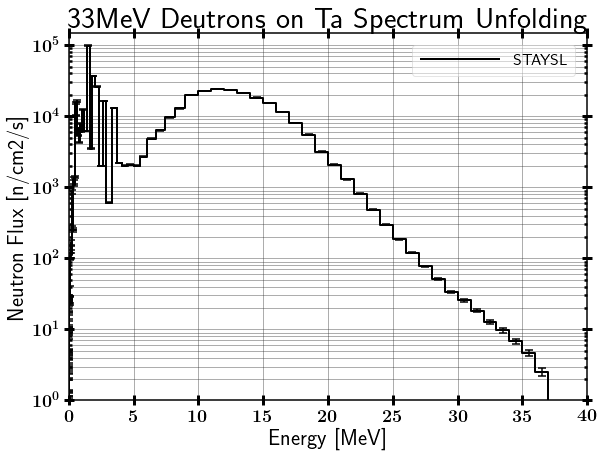

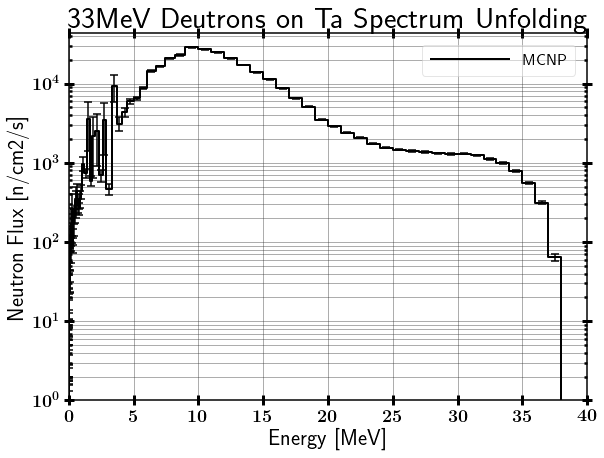

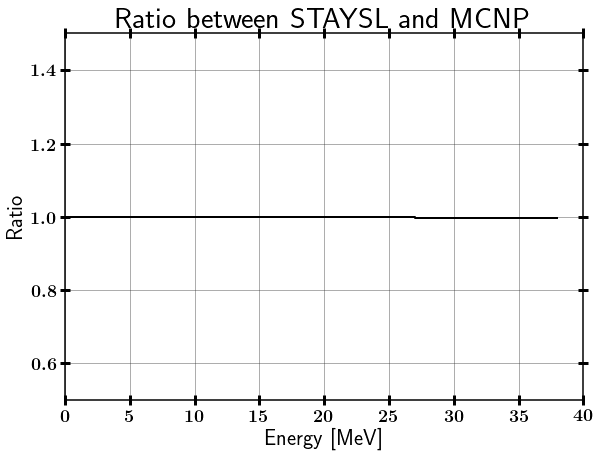

In [14]:
iter = 3

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[-1]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

### Iterative Solution #5:

  - The iterative solution sets the uncertainty for all bins to 100% and sets a unform 1E-7 flux per src.  
  - It does update the uncertainty throughout the convergence process. 

In [15]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration5/'
iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration5/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration5/stayslin.out
Chi^2 = 492.19913, Std Norm = 9.39165764761
Chi^2 = 15.83884
Chi^2 = 12.90723
Chi^2 = 11.33592
Chi^2 = 10.98585
Chi^2 = 10.77967
Chi^2 = 10.62761
Chi^2 = 10.50575
Chi^2 = 10.40402
Chi^2 = 10.31711
Chi^2 = 10.24039
Chi^2 = 10.17249
Chi^2 = 10.11101
Chi^2 = 10.05362
Chi^2 = 10.00069
Chi^2 = 9.95222
Chi^2 = 9.90622
Chi^2 = 9.86329
Chi^2 = 9.82195
Chi^2 = 9.78243
Chi^2 = 9.74464
Chi^2 = 9.70917
Chi^2 = 9.67503
Chi^2 = 9.64283
Chi^2 = 9.61117
Chi^2 = 9.58064
Chi^2 = 9.55185
Chi^2 = 9.52416
Chi^2 = 9.49724
Chi^2 = 9.47087
Chi^2 = 9.44553
Chi^2 = 9.42121
C

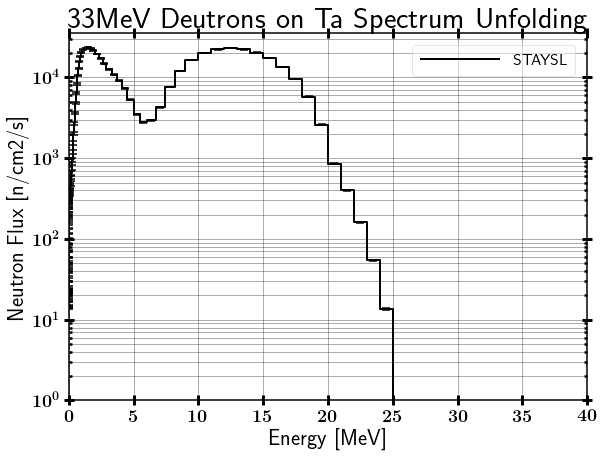

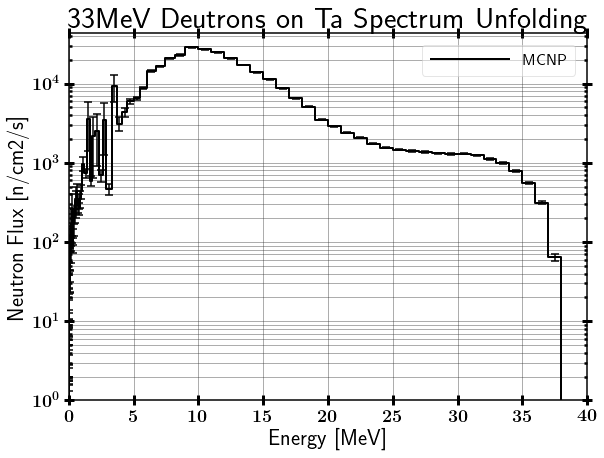

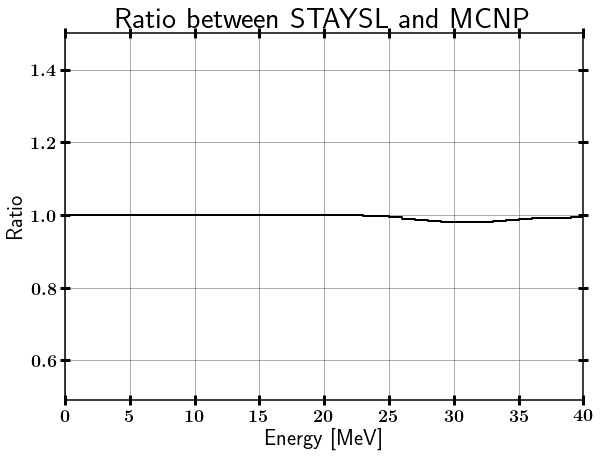

In [16]:
iter = 4

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[-1]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

### Iterative Solution #6:

  - This solution sets the uncertainty to 100 % for all bins. 
  - The iterative solution uses the MCNP spectrum and sets a nominal 5E-9 flux per src for zero flux bins.  
  - It does update the uncertainty throughout the convergence process. 

In [17]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration6/'
iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration6/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration6/stayslin.out
Chi^2 = 14.52346, Std Norm = 9.40594427158
Chi^2 = 16.89131
Chi^2 = 13.46052
Chi^2 = 12.8704
Chi^2 = 12.55881
Chi^2 = 12.35386
Chi^2 = 12.20564
Chi^2 = 12.09307
Chi^2 = 12.00518
Chi^2 = 11.93468
Chi^2 = 11.87767
Chi^2 = 11.82979
Chi^2 = 11.78882
Chi^2 = 11.75329
Chi^2 = 11.72183
Chi^2 = 11.69353
Chi^2 = 11.66747
Chi^2 = 11.64408
Chi^2 = 11.62207
Chi^2 = 11.60104
Chi^2 = 11.58124
Chi^2 = 11.56239
Chi^2 = 11.54502
Chi^2 = 11.52842
Chi^2 = 11.51202
Chi^2 = 11.49653
Chi^2 = 11.48125
Chi^2 = 11.46634
Chi^2 = 11.45163
Chi^2 = 11.43754
Chi^2 = 11.42341
Chi

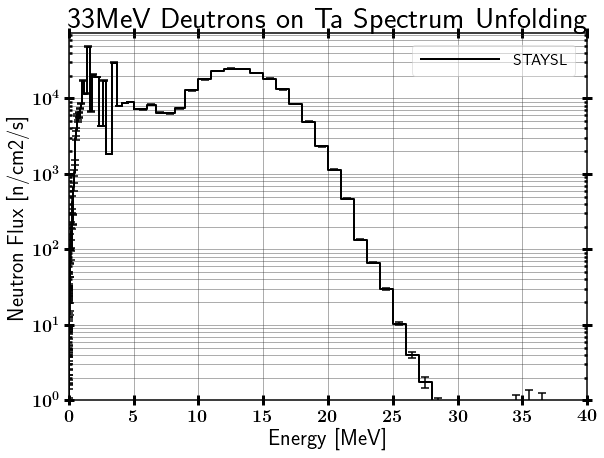

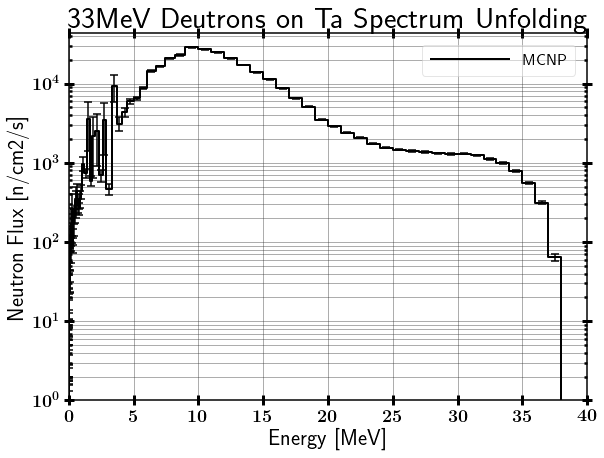

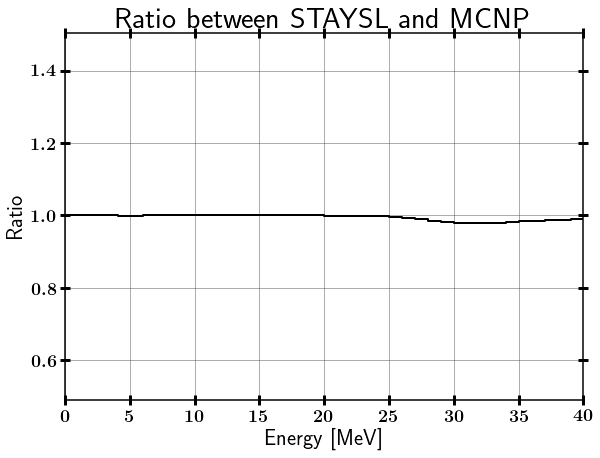

In [18]:
iter = 5

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[-1]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

### Iterative Solution #7:

  - This solution sets the uncertainty to 100 % for all bins up to 38 MeV. 
  - The iterative solution uses the MCNP spectrum and sets a nominal 5E-9 flux per src for zero flux bins.  
  - It does update the uncertainty throughout the convergence process. 

In [19]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration7/'
iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration7/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration7/stayslin.out
Chi^2 = 14.54445, Std Norm = 8.16521108055
Chi^2 = 16.83607
Chi^2 = 13.41931
Chi^2 = 12.83664
Chi^2 = 12.53092
Chi^2 = 12.33013
Chi^2 = 12.18556
Chi^2 = 12.07585
Chi^2 = 11.99081
Chi^2 = 11.92263
Chi^2 = 11.86766
Chi^2 = 11.82164
Chi^2 = 11.78172
Chi^2 = 11.74707
Chi^2 = 11.7165
Chi^2 = 11.68857
Chi^2 = 11.66353
Chi^2 = 11.6402
Chi^2 = 11.6186
Chi^2 = 11.59841
Chi^2 = 11.57931
Chi^2 = 11.56118
Chi^2 = 11.5441
Chi^2 = 11.52748
Chi^2 = 11.51138
Chi^2 = 11.49572
Chi^2 = 11.4808
Chi^2 = 11.46627
Chi^2 = 11.45211
Chi^2 = 11.43828
Chi^2 = 11.42427
Chi^2 =

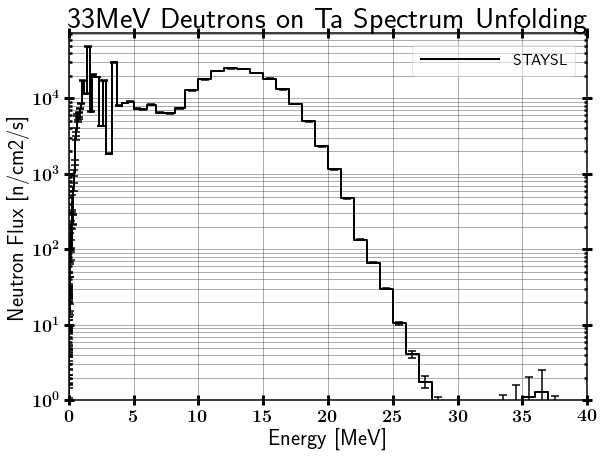

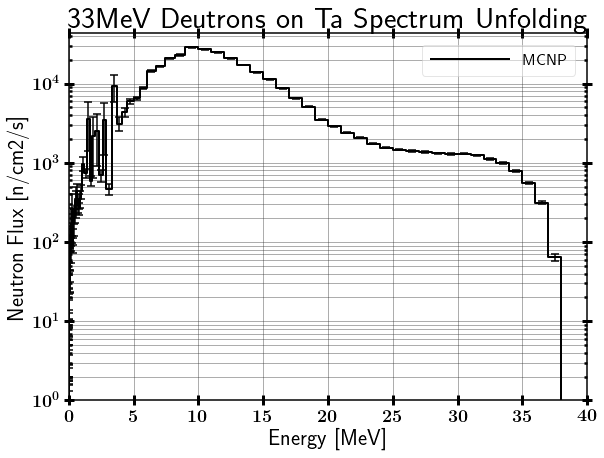

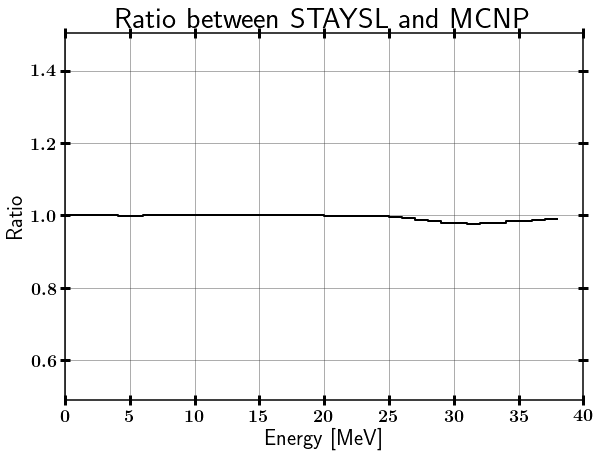

In [20]:
iter = 6

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[-1]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

### Iterative Solution #8:

  - This solution drops the Al(n, p) channel. 
  - The iterative solution sets the uncertainty for zero flux bins to 100% and sets a nominal 5E-9 flux per src.  
  - It does update the uncertainty throughout the convergence process. 

In [21]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration8/'
iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration8/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration8/stayslin.out
Chi^2 = 27.68117, Std Norm = 5.36003886087
Chi^2 = 20.73624
Chi^2 = 19.82207
Chi^2 = 19.17058
Chi^2 = 18.63281
Chi^2 = 18.17162
Chi^2 = 17.76788
Chi^2 = 17.40951
Chi^2 = 17.09179
Chi^2 = 16.80704
Chi^2 = 16.55147
Chi^2 = 16.32183
Chi^2 = 16.11323
Chi^2 = 15.92307
Chi^2 = 15.75024
Chi^2 = 15.59186
Chi^2 = 15.4472
Chi^2 = 15.31336
Chi^2 = 15.19011
Chi^2 = 15.0754
Chi^2 = 14.96927
Chi^2 = 14.87041
Chi^2 = 14.77829
Chi^2 = 14.69187
Chi^2 = 14.61021
Chi^2 = 14.5338
Chi^2 = 14.46207
Chi^2 = 14.39442
Chi^2 = 14.33073
Chi^2 = 14.27109
Chi^2 = 14.21448
Chi^2

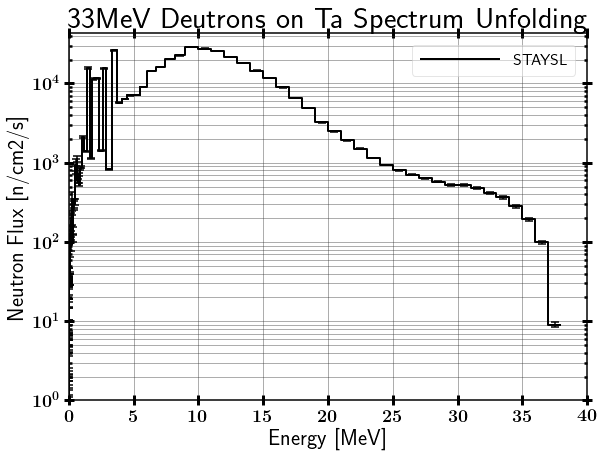

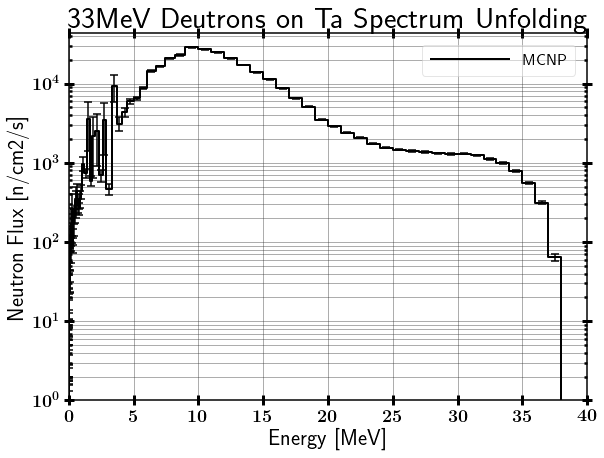

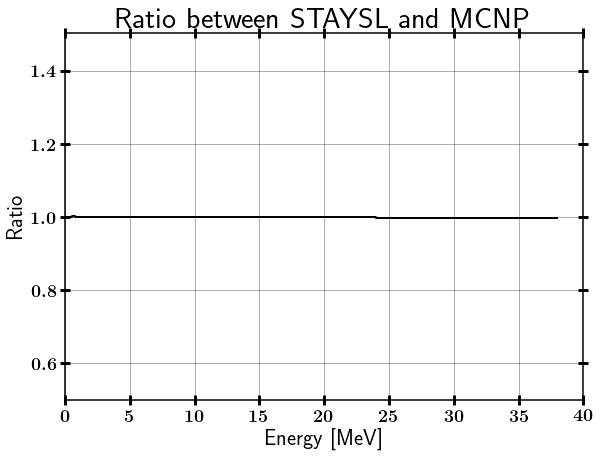

In [22]:
iter = 7

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[-1]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))